In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
ronaldo = pd.read_csv('ronaldodata.csv')
ronaldo.drop_duplicates(subset=['Playing_Position'], keep='first', inplace=False)
ronaldo.head(10)

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,34,2:0,Solo run,NaN
1,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,90+5,3:0,Header,Rui Jorge
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:2,NaN,88,1:2,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:1,NaN,67,3:0,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:1,NaN,13,3:0,NaN,NaN
5,03/04,Premier League,11,11/1/03,H,Manchester United,Portsmouth FC,3:0,RW,80,2:0,Direct free kick,NaN
6,03/04,FA Cup,Fifth Round,2/14/04,H,Manchester United,Manchester City,4:2,RW,74,3:0,Right-footed shot,NaN
7,03/04,Premier League,29,3/20/04,H,Manchester United,Tottenham Hotspur,3:0,NaN,89,2:0,Right-footed shot,NaN
8,03/04,Premier League,32,4/10/04,A,Manchester United,Birmingham City,1:2,NaN,60,1:1,Header,Ryan Giggs
9,03/04,Premier League,38,5/15/04,A,Manchester United,Aston Villa,0:2,NaN,4,0:1,Right-footed shot,NaN


In [4]:
ronaldo.tail(10)

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
688,21/22,Premier League,18,2/15/22,H,Manchester United,Brighton & Hove Albion,2:0,CF,51,1:0,Right-footed shot,Scott McTominay
689,21/22,Premier League,29,3/12/22,H,Manchester United,Tottenham Hotspur,3:2,CF,12,1:0,Right-footed shot,Fred
690,21/22,Premier League,29,3/12/22,H,Manchester United,Tottenham Hotspur,3:2,CF,38,2:1,Right-footed shot,Jadon Sancho
691,21/22,Premier League,29,3/12/22,H,Manchester United,Tottenham Hotspur,3:2,CF,81,3:2,Header,Alex Telles
692,21/22,Premier League,33,4/16/22,H,Manchester United,Norwich City,3:2,CF,7,1:0,Right-footed shot,Anthony Elanga
693,21/22,Premier League,33,4/16/22,H,Manchester United,Norwich City,3:2,CF,32,2:0,Header,Alex Telles
694,21/22,Premier League,33,4/16/22,H,Manchester United,Norwich City,3:2,CF,76,3:2,Direct free kick,NaN
695,21/22,Premier League,34,4/23/22,A,Manchester United,Arsenal FC,3:1,CF,34,2:1,Left-footed shot,Nemanja MatiÄ‡
696,21/22,Premier League,37,4/28/22,H,Manchester United,Chelsea FC,1:1,CF,62,1:1,Right-footed shot,Nemanja MatiÄ‡
697,21/22,Premier League,35,5/2/22,H,Manchester United,Brentford FC,3:0,CF,61,2:0,Penalty,NaN


In [5]:
ronaldo.describe()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
count,698,698,698,698,698,698,698,698,641,698,698,683,458
unique,20,15,52,461,2,4,124,51,5,106,35,11,86
top,14/15,LaLiga,Group Stage,4/5/15,H,Real Madrid,Sevilla FC,3:0,LW,90,1:0,Right-footed shot,Karim Benzema
freq,61,311,73,5,402,450,27,49,356,17,111,251,44


In [6]:
pd.DataFrame(ronaldo.apply(lambda col: len(col.unique())),columns=["Unique Values Count"])

,Unique Values Count
Season,20
Competition,15
Matchday,52
Date,461
Venue,2
Club,4
Opponent,124
Result,51
Playing_Position,6
Minute,106


In [7]:
total = ronaldo.isnull().sum().sort_values(ascending = False)
percent = (ronaldo.isnull().sum()/ronaldo.isnull().sum().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent],axis = 1, keys = ['TOTAL_MISSING','PERCENTAGE_RATE'])
missing_data

,TOTAL_MISSING,PERCENTAGE_RATE
Goal_assist,240,18.461538
Playing_Position,57,4.384615
Type,15,1.153846
At_score,0,0.000000
Minute,0,0.000000
Result,0,0.000000
Opponent,0,0.000000
Club,0,0.000000
Venue,0,0.000000
Date,0,0.000000


In [8]:
pd.DataFrame(ronaldo.Competition.value_counts())

,Competition
LaLiga,311
UEFA Champions League,140
Premier League,102
Serie A,81
Copa del Rey,22
FA Cup,13
FIFA Club World Cup,7
EFL Cup,4
Supercopa,4
Italy Cup,4


Text(0.5, 1.0, 'Goals per competition')

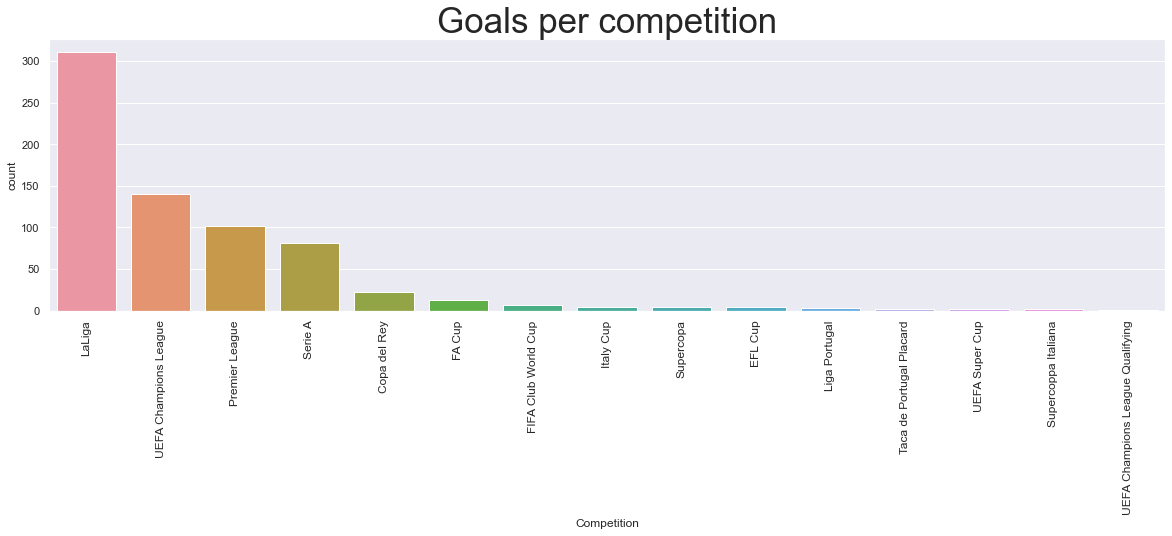

In [9]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12,rotation='vertical')
p=sns.countplot(ronaldo['Competition'],order=ronaldo.Competition.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals per competition",fontsize=35)

In [10]:
#.Plot a graph showing Goals per season

Text(0.5, 1.0, 'Goals per Season')

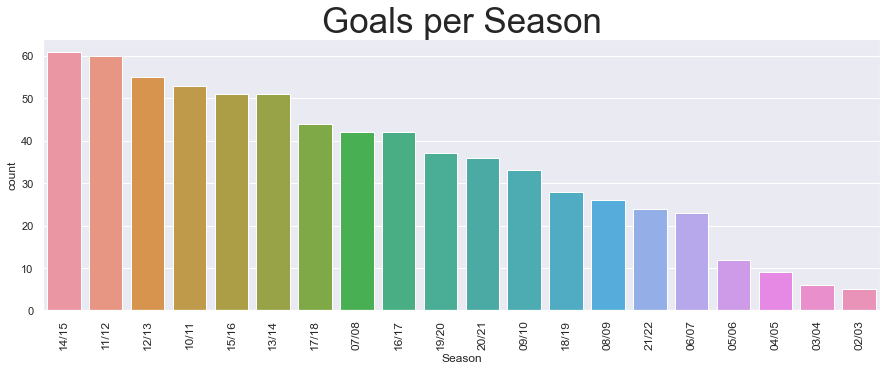

In [11]:
sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(fontsize=12,rotation='vertical')
p=sns.countplot(ronaldo['Season'],order=ronaldo.Season.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals per Season",fontsize=35)

In [12]:
#3.Plot a graph showing Goals per clubs

<AxesSubplot:title={'center':'GOALS PER CLUB'}, ylabel='Club'>

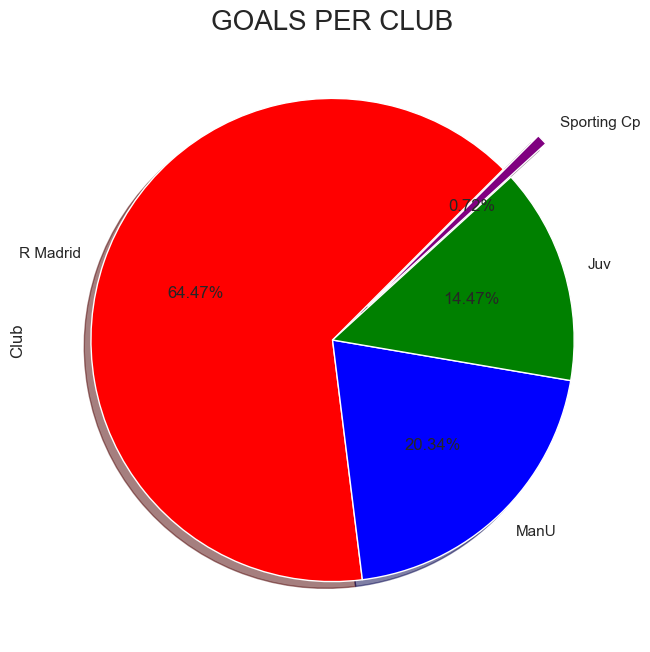

In [13]:
plt.figure(figsize=(8,8), dpi = 100)
plt.title('GOALS PER CLUB', fontsize=20)
ronaldo.Club.value_counts().plot(kind='pie', labels=['R Madrid','ManU','Juv', 'Sporting Cp'],autopct='%1.2f%%',shadow=True,explode = [0.0,0.0,0.0,0.2],colors=
 ['red','blue','green','purple'],startangle = 45)

In [14]:
#4.Plot a graph showing Goals per playing Position

<AxesSubplot:title={'center':'GOALS PER PLAYING POSITIONS'}, ylabel='Playing_Position'>

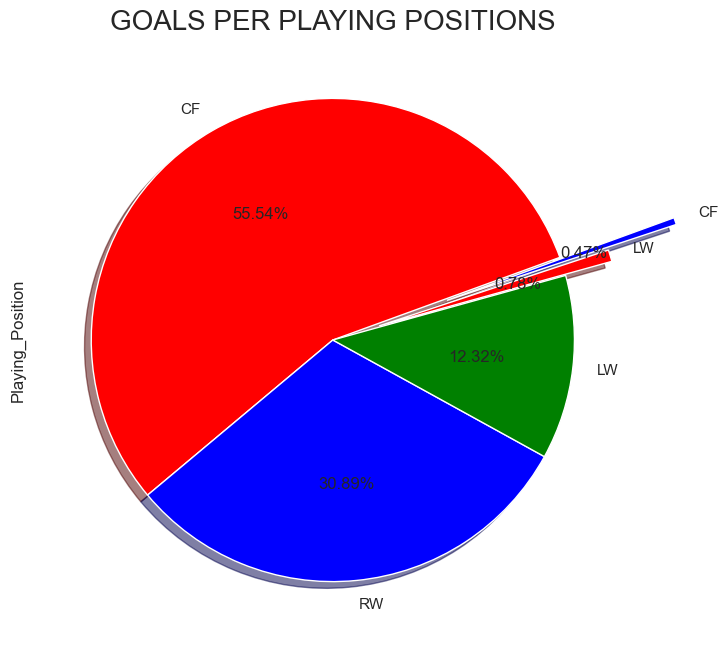

In [37]:
plt.figure(figsize=(8,8), dpi = 100)
plt.title('GOALS PER PLAYING POSITIONS', fontsize=20)
ronaldo.Playing_Position.value_counts().plot(kind='pie', labels=['CF', 'RW','LW', 'LW','CF'],autopct='%1.2f%%',shadow=True,
                                             explode = [0.0,0.0,0.0,0.2,0.5],colors=
 ['red','blue','green'],startangle = 20)

In [16]:
#5.Plot a graph showing Goals per Game Minute

In [17]:
mins=list(map(str, range(1,121)))
mins.insert(45,"1stE")
mins.insert(91,"2ndE")
mins.insert(122,"ExtE")
ronaldo.loc[ronaldo.Minute.str[:3]=='45+', 'Minute'] = '1stE'
ronaldo.loc[ronaldo.Minute.str[:3]=='90+', 'Minute'] = '2ndE'
ronaldo.loc[ronaldo.Minute.str[:4]=='120+', 'Minute'] = 'ExtE'
mins1=mins[:25]
mins2=mins[20:46]
mins3=mins[45:65]
mins4=mins[65:92]
mins5=mins[92:]

Text(0.5, 1.0, 'GOALS PER GAME MINUTE (1-25)')

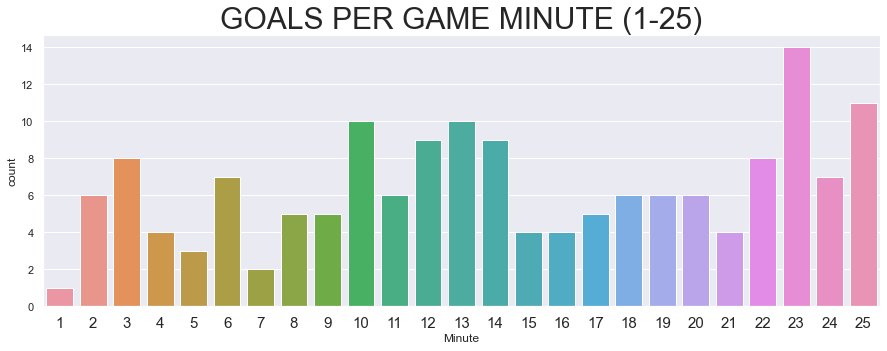

In [18]:
sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(fontsize=15)
p=sns.countplot(ronaldo['Minute'],order=mins1)
p.axes.set_title("GOALS PER GAME MINUTE (1-25)",fontsize=30)

Text(0.5, 1.0, 'GOALS PER GAME MINUTE (25-First 1/2 Extra Time)')

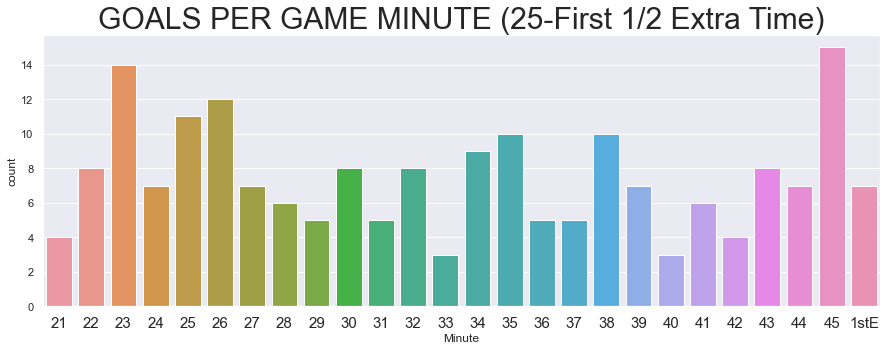

In [19]:
sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(fontsize=15)
p=sns.countplot(ronaldo['Minute'],order=mins2)
p.axes.set_title("GOALS PER GAME MINUTE (25-First 1/2 Extra Time)",fontsize=30)

Text(0.5, 1.0, 'GOALS PER GAME MINUTE (45-65)')

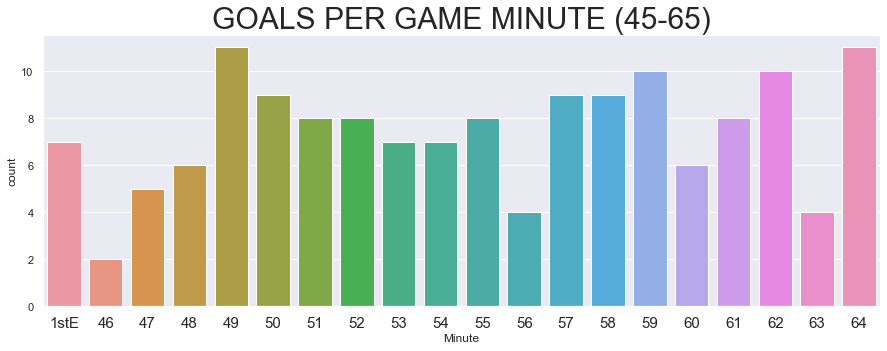

In [20]:
sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(fontsize=15)
p=sns.countplot(ronaldo['Minute'],order=mins3)
p.axes.set_title("GOALS PER GAME MINUTE (45-65)",fontsize=30)

Text(0.5, 1.0, 'GOALS PER GAME MINUTE (65- 2nd 1/2 Extra Time)')

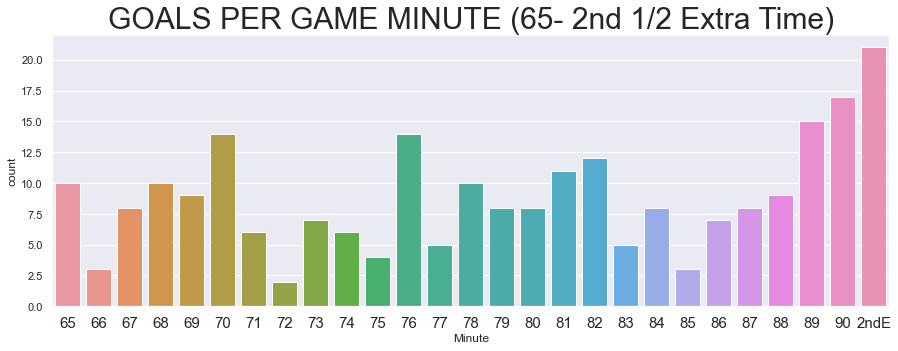

In [21]:
sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(fontsize=15)
p=sns.countplot(ronaldo['Minute'],order=mins4)
p.axes.set_title("GOALS PER GAME MINUTE (65- 2nd 1/2 Extra Time)",fontsize=30)

Text(0.5, 1.0, 'GOALS PER GAME MINUTE (92 - Extra Time)')

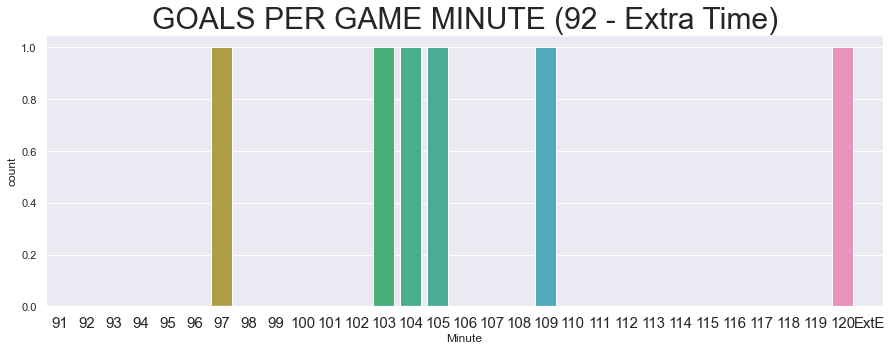

In [22]:
sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(fontsize=15)
p=sns.countplot(ronaldo['Minute'],order=mins5)
p.axes.set_title("GOALS PER GAME MINUTE (92 - Extra Time)",fontsize=30)

In [23]:
#6.Plot a graph showing Goals per Type_of_goal

Text(0.5, 1.0, 'GOALS PER TYPE OF GOAL ')

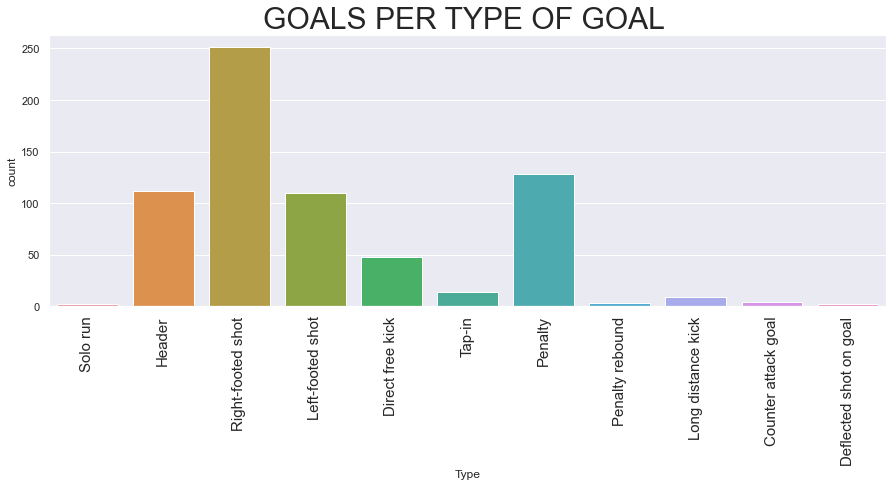

In [24]:
sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(ronaldo['Type'])
p.axes.set_title("GOALS PER TYPE OF GOAL ",fontsize=30)

In [25]:
#.Plot a graph showing Favourite Opponents

Text(0.5, 1.0, 'FAVOURITE OPPONENTS')

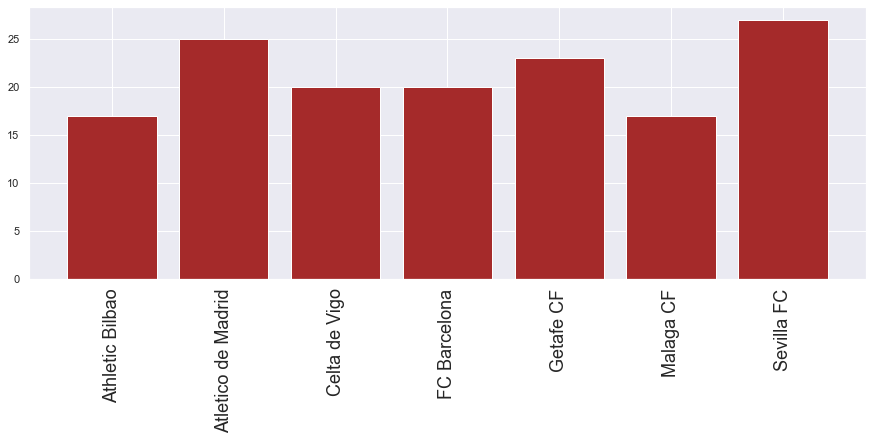

In [49]:
sns.set(rc={'figure.figsize':(15,5)})
opponents_ronaldo=ronaldo.groupby('Opponent').size().reset_index(name='count')
fav_opponents_ronaldo=opponents_ronaldo[opponents_ronaldo["count"]>15]
plt.xticks(fontsize=18,rotation='vertical')
plt.bar(x=fav_opponents_ronaldo['Opponent'],height=fav_opponents_ronaldo['count'],color="brown")
p.axes.set_title("FAVOURITE OPPONENTS",fontsize=15)


In [27]:

#8.Plot a graph showing Goals Assisted by Others

In [28]:
mins=list(map(str, ronaldo.Goal_assist.value_counts().sort_values(ascending=False).index))
for min in ronaldo['Goal_assist']:
    if min not in mins:
        mins.append(min)
mins1=mins[:int(len(mins)/5)]
mins2=mins[int(len(mins)/5):int(2*len(mins)/5)]
mins3=mins[2*int(len(mins)/5):int(3*len(mins)/5)]
mins4=mins[3*int(len(mins)/5):int(4*len(mins)/5)]
mins5=mins[int(4*len(mins)/5):]

Text(0.5, 1.0, 'Goals Assisted By Others')

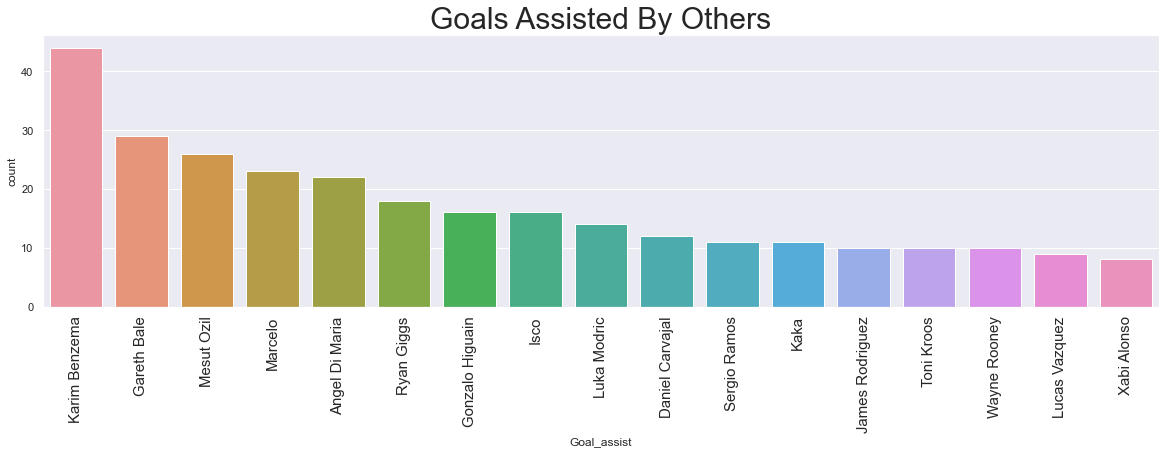

In [38]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(ronaldo['Goal_assist'],order=mins1)
p.axes.set_title("Goals Assisted By Others",fontsize=30)

Text(0.5, 1.0, 'Goals Assisted By Others')

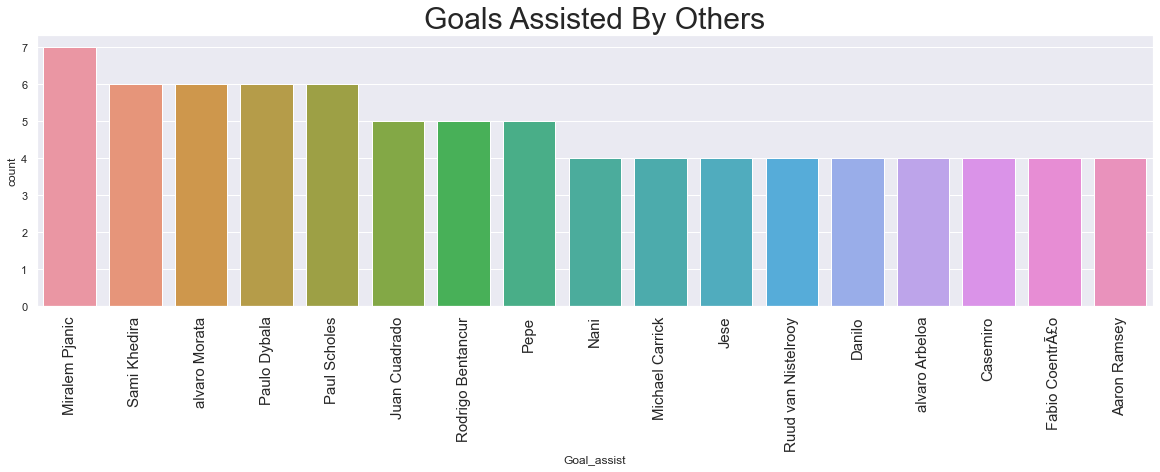

In [42]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(ronaldo['Goal_assist'],order=mins2)
p.axes.set_title("Goals Assisted By Others",fontsize=30)

Text(0.5, 1.0, 'Goals Assisted By Others ')

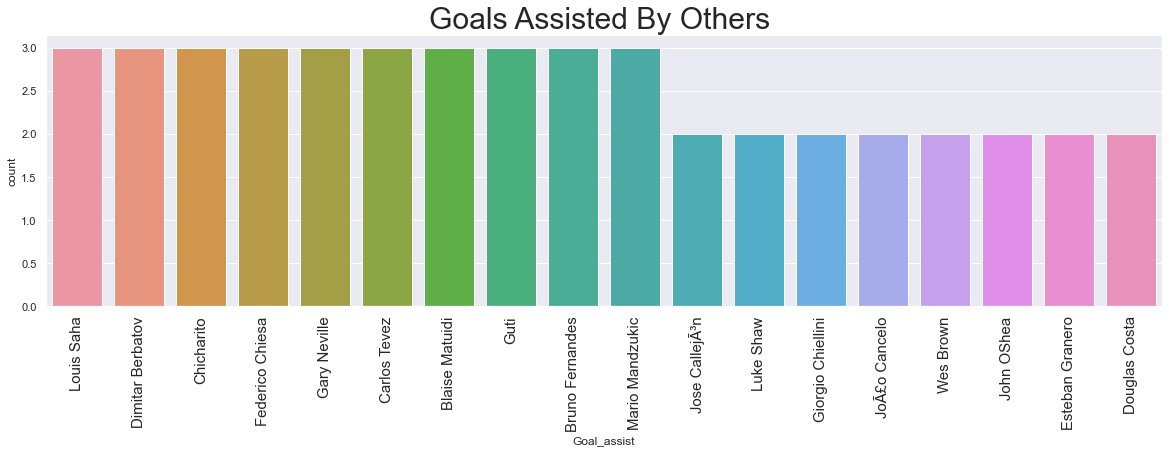

In [39]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(ronaldo['Goal_assist'],order=mins3)
p.axes.set_title("Goals Assisted By Others ",fontsize=30)

Text(0.5, 1.0, 'Goals Assisted By Others')

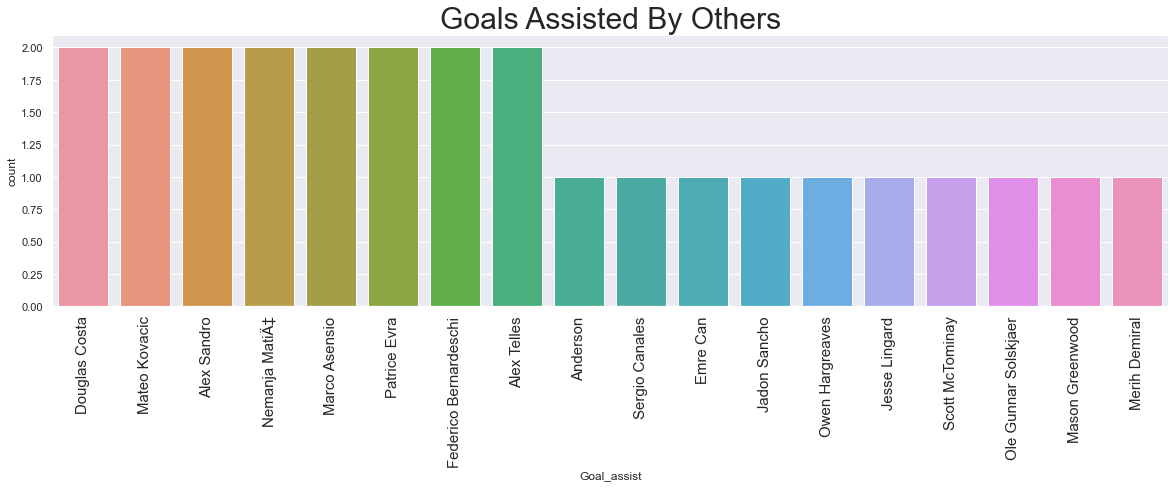

In [41]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(ronaldo['Goal_assist'],order=mins4)
p.axes.set_title("Goals Assisted By Others",fontsize=30)

Text(0.5, 1.0, 'Goals Assisted By Others')

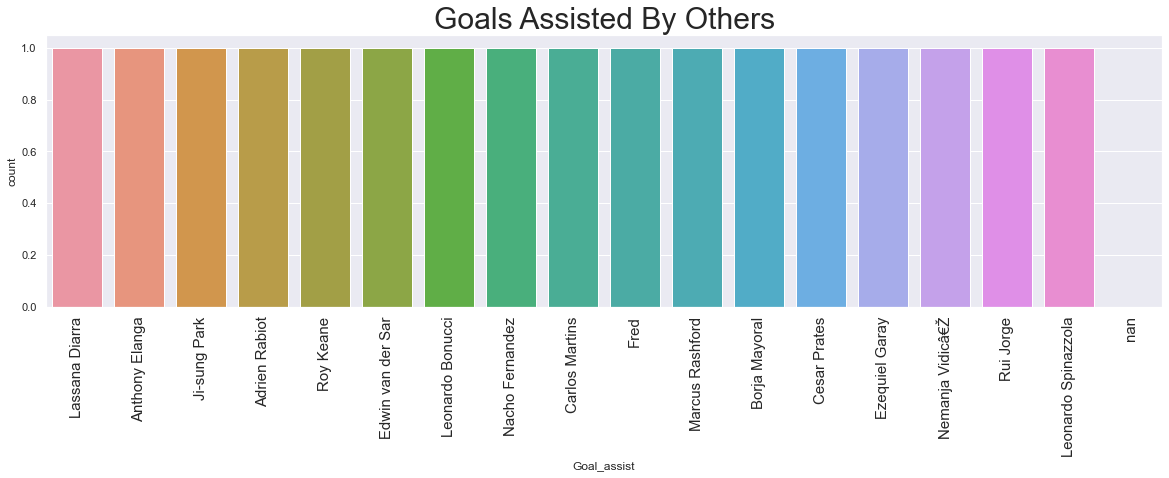

In [40]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(ronaldo['Goal_assist'],order=mins5)
p.axes.set_title("Goals Assisted By Others",fontsize=30)